In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 
import missingno as mn

municipalities = pd.read_csv("Municipalities.csv", sep=",")
municipalities

,tc,area,pop,pden,wden,urb,paper,glass,metal,plastic,msw_so,msw_un,msw,sor,geo,roads,s_wteregio,s_landfill
0,502.250000,283.750000,22648,79.816742,119671.476600,2,4.363508,3.592508,0.462317,1.131815,20396261.0,13560520,33956781.0,60.07,3,285.0,33.105049,15.233530
1,228.050003,34.439999,4952,143.786301,70030.984380,3,9.887817,9.518352,1.860965,4.643623,1831407.0,580460,2411867.0,75.93,3,11.0,33.105049,15.233530
2,268.010010,26.620001,3895,146.318558,81116.523440,3,11.991079,6.653014,0.744725,5.224834,1694922.0,464400,2159322.0,78.49,3,49.0,33.105049,15.233530
3,199.089996,84.300003,7140,84.697502,43320.460940,3,9.762878,7.551381,0.746540,5.202531,2881055.0,770860,3651915.0,78.89,3,165.0,33.105049,15.233530
4,233.639999,35.700001,12193,341.540619,201565.265600,2,6.601569,4.334883,0.103101,5.120555,3026700.0,4169180,7195880.0,42.06,1,60.0,4.046452,45.411903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3637,83.059998,86.360001,604,6.993978,1622.660889,3,17.162267,13.129670,2.281404,1.769747,90488.0,49645,140133.0,64.57,3,15.0,18.539640,11.318043
3638,132.809998,209.649994,2423,11.557358,6992.683105,3,11.589232,10.927575,3.740750,1.206126,1035475.0,430541,1466016.0,70.63,3,52.0,18.539640,11.318043
3639,156.429993,56.240002,2660,47.297295,60544.378910,3,15.252381,15.671909,2.993760,3.251820,2207826.0,1197190,3405016.0,64.84,3,40.0,18.539640,11.318043
3640,370.880005,38.840000,1320,33.985580,65064.289060,3,14.936387,14.949723,3.731554,1.353886,1900547.0,626550,2527097.0,75.21,3,66.0,18.539640,11.318043


In [2]:
municipalities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tc          3642 non-null   float64
 1   area        3642 non-null   float64
 2   pop         3642 non-null   int64  
 3   pden        3642 non-null   float64
 4   wden        3642 non-null   float64
 5   urb         3642 non-null   int64  
 6   paper       3642 non-null   float64
 7   glass       3642 non-null   float64
 8   metal       3642 non-null   float64
 9   plastic     3642 non-null   float64
 10  msw_so      3642 non-null   float64
 11  msw_un      3642 non-null   int64  
 12  msw         3642 non-null   float64
 13  sor         3642 non-null   float64
 14  geo         3642 non-null   int64  
 15  roads       3642 non-null   float64
 16  s_wteregio  3642 non-null   float64
 17  s_landfill  3642 non-null   float64
dtypes: float64(14), int64(4)
memory usage: 512.3 KB


Text(0.5, 1.0, 'Not Sorted')

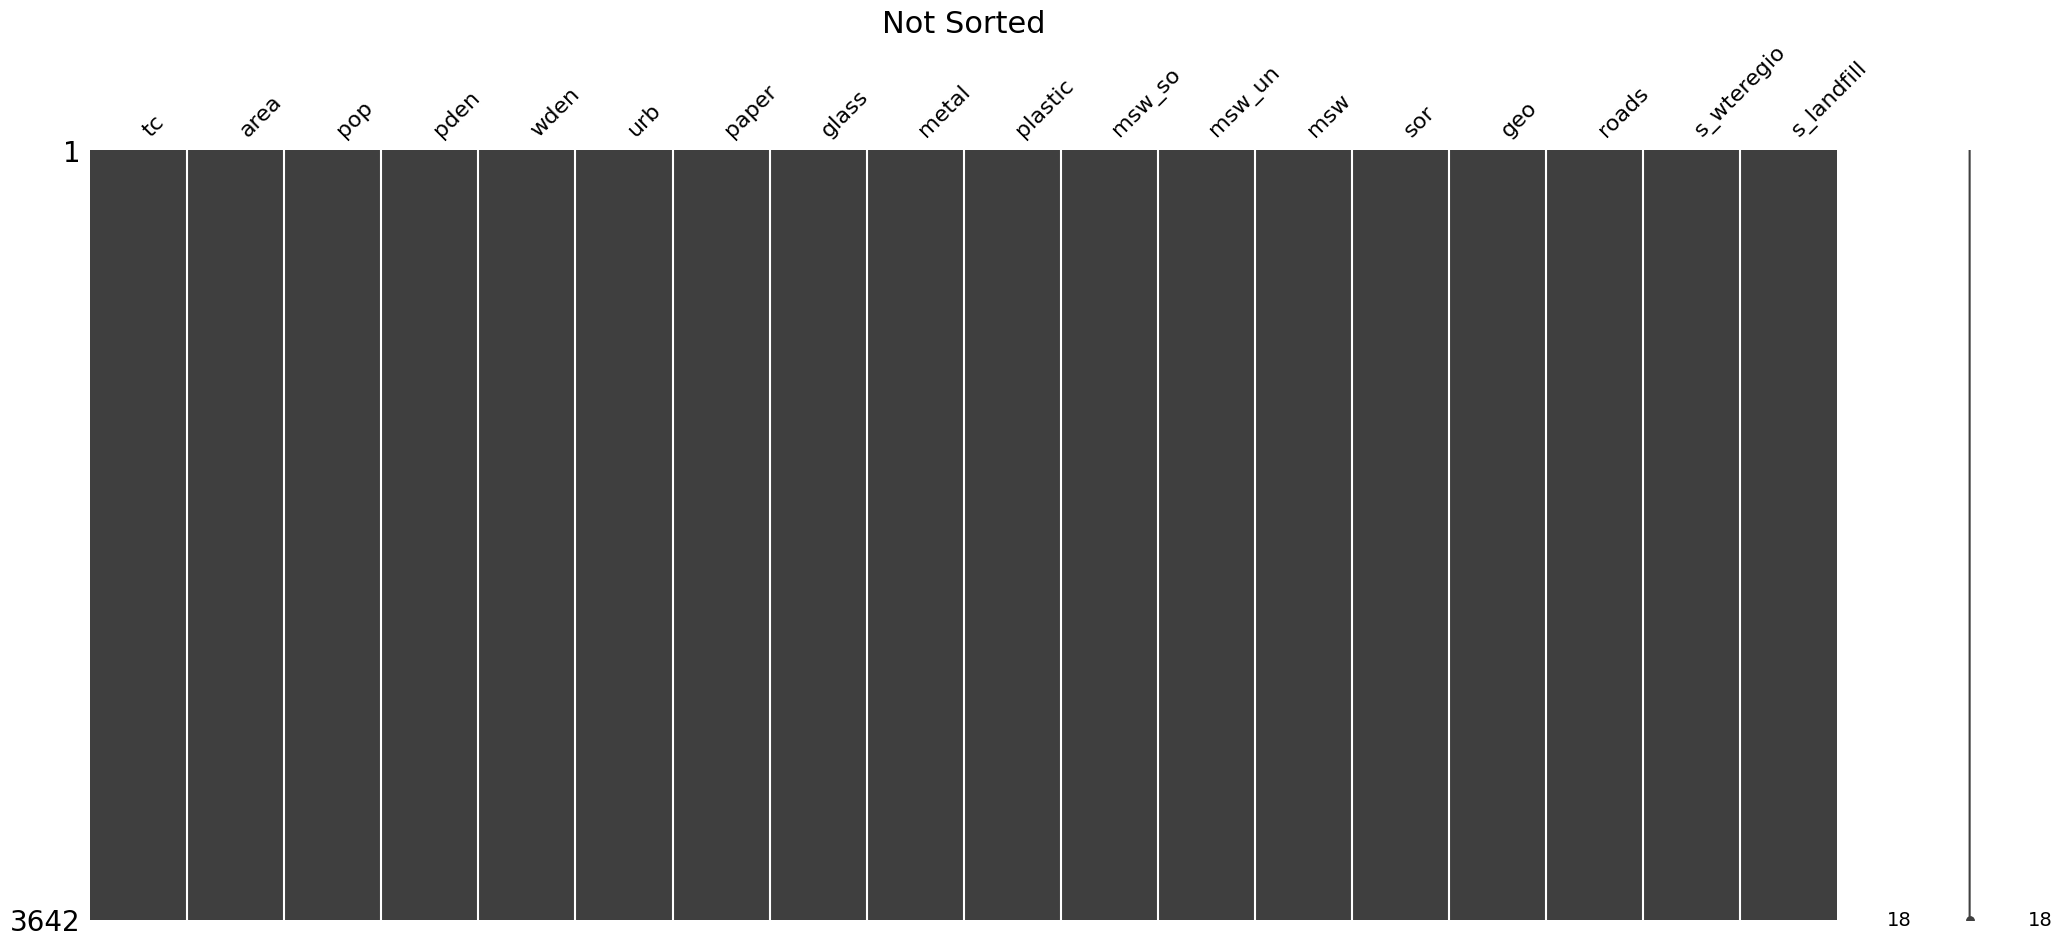

In [3]:
#Visualizing missing values

import missingno as mn

mn.matrix(municipalities)
plt.title("Not Sorted", fontsize=22)

In [4]:
#Missing value percentage

Missing_Values_Percentage = municipalities.isnull().mean()*100
Missing_Values_Percentage

tc            0.0
area          0.0
pop           0.0
pden          0.0
wden          0.0
urb           0.0
paper         0.0
glass         0.0
metal         0.0
plastic       0.0
msw_so        0.0
msw_un        0.0
msw           0.0
sor           0.0
geo           0.0
roads         0.0
s_wteregio    0.0
s_landfill    0.0
dtype: float64

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
import copy


municipalities_imputed = copy.deepcopy(municipalities)
municipalities_imputed['urb'] = municipalities_imputed['urb'].astype(str)
municipalities_imputed['geo'] = municipalities_imputed['geo'].astype(str)
municipalities_imputed.info()

# define objects that can encode each variable as integer    
encoders = dict() 
categorical_headers = ['urb','geo']
           
# train all encoders 
for col in categorical_headers:
    municipalities_imputed[col] = municipalities_imputed[col].str.strip()
    
    # integer encoded variables
    encoders[col] = LabelEncoder() # save the encoder
    municipalities_imputed[col+'_int'] = encoders[col].fit_transform(municipalities_imputed[col])

# scale the numeric, continuous variables
numeric_headers = ['tc', 'area', 'pop', 'pden', 'wden', 'paper', 'glass', 'metal', 'plastic', 'msw_so', 'msw_un', 'msw', 'sor', 
                  'roads', 's_wteregio', 's_landfill']

for col in numeric_headers:
    municipalities_imputed[col] = municipalities_imputed[col].astype(np.float)
    
    ss = StandardScaler()
    municipalities_imputed[col] = ss.fit_transform(municipalities_imputed[col].values.reshape(-1, 1))

del municipalities_imputed['urb']
del municipalities_imputed['geo']

municipalities_imputed.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3642 entries, 0 to 3641
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tc          3642 non-null   float64
 1   area        3642 non-null   float64
 2   pop         3642 non-null   int64  
 3   pden        3642 non-null   float64
 4   wden        3642 non-null   float64
 5   urb         3642 non-null   object 
 6   paper       3642 non-null   float64
 7   glass       3642 non-null   float64
 8   metal       3642 non-null   float64
 9   plastic     3642 non-null   float64
 10  msw_so      3642 non-null   float64
 11  msw_un      3642 non-null   int64  
 12  msw         3642 non-null   float64
 13  sor         3642 non-null   float64
 14  geo         3642 non-null   object 
 15  roads       3642 non-null   float64
 16  s_wteregio  3642 non-null   float64
 17  s_landfill  3642 non-null   float64
dtypes: float64(14), int64(2), object(2)
memory usage: 512.3+ KB


,tc,area,pop,pden,wden,paper,glass,metal,plastic,msw_so,msw_un,msw,sor,roads,s_wteregio,s_landfill,urb_int,geo_int
0,4.877192,4.346927,0.208263,-0.446917,-0.236381,-1.763990,-1.619782,-0.995797,-1.632414,1.012951,0.602365,0.813839,-0.469068,0.571544,0.692059,-0.172662,1,2
1,1.058477,-0.093736,-0.105752,-0.366052,-0.371178,-0.321056,0.074842,0.066255,-0.448479,-0.102742,-0.085687,-0.095925,0.468114,-0.288516,0.692059,-0.172662,2,2
2,1.614990,-0.233024,-0.124509,-0.362851,-0.341076,0.228310,-0.744563,-0.781353,-0.252535,-0.110944,-0.091839,-0.103209,0.619386,-0.169238,0.692059,-0.172662,2,2
3,0.655158,0.794361,-0.066926,-0.440747,-0.443710,-0.353690,-0.487656,-0.779975,-0.260055,-0.039661,-0.075594,-0.060162,0.643023,0.194875,0.692059,-0.172662,2,2
4,1.136328,-0.071293,0.022739,-0.116067,-0.014000,-1.179415,-1.407483,-1.268565,-0.287691,-0.030908,0.104545,0.042047,-1.533294,-0.134710,-1.185399,1.323032,1,0


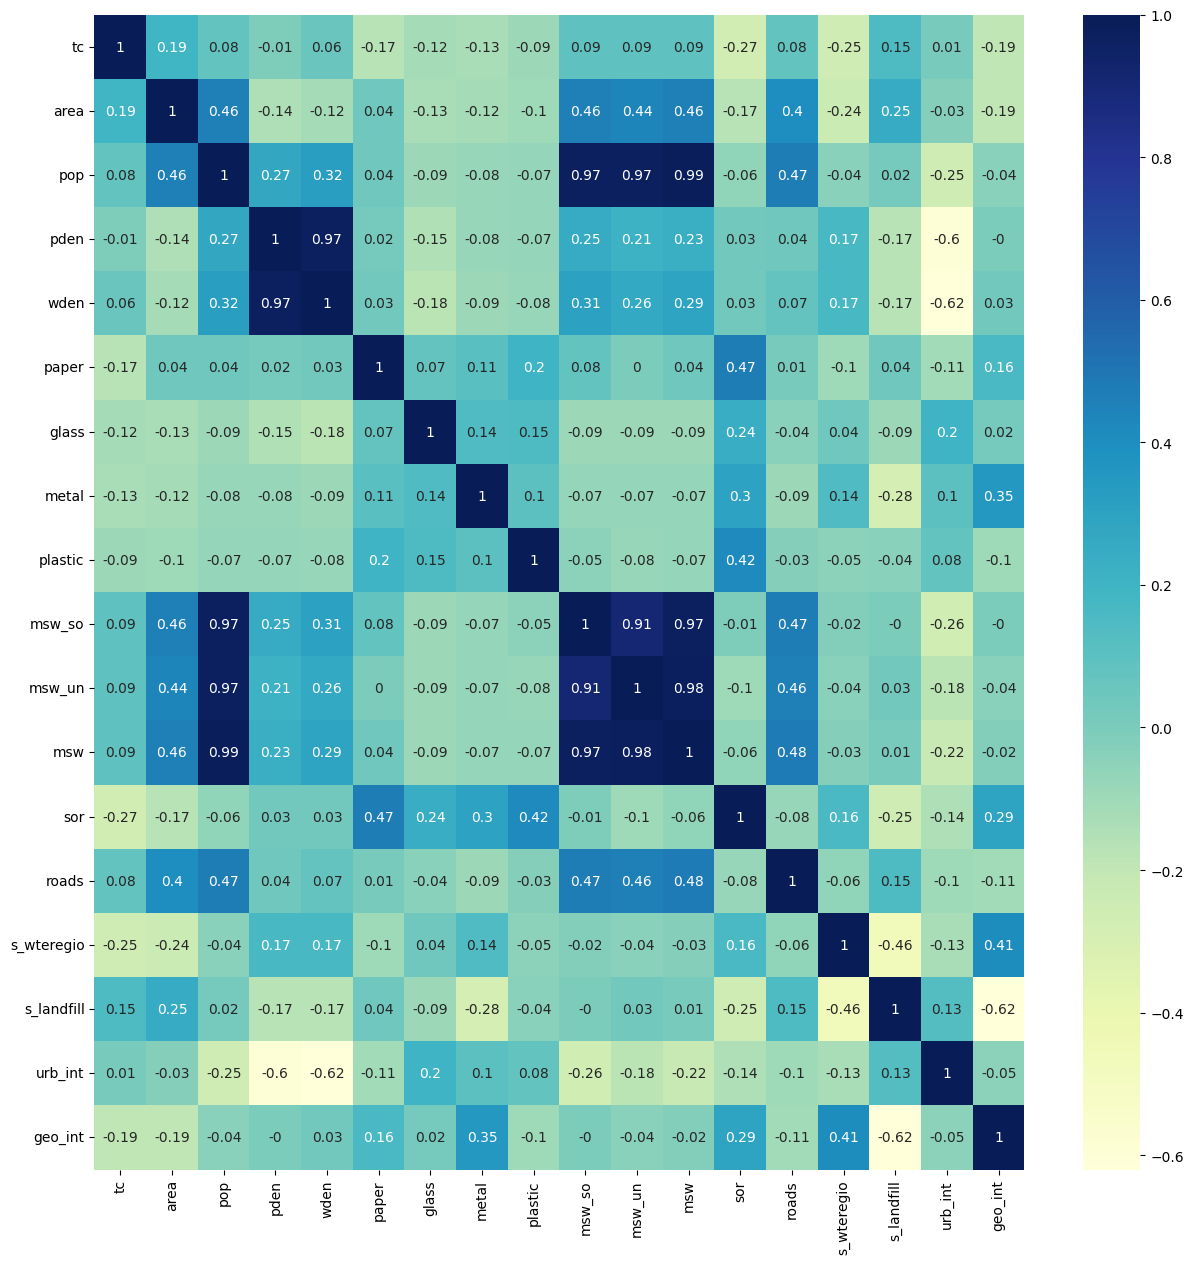

In [6]:
corr_matrix = municipalities_imputed.corr().round(2)
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True,cmap='YlGnBu')
plt.show()

## PCA

In [7]:
from sklearn.decomposition import PCA

#df=pd.DataFrame(municipalities_imputed,columns!=["urb_int", "geo_int"])
pca_model = PCA(n_components=15, whiten=True)
pca_result = pca_model.fit_transform(municipalities_imputed.drop(columns=['tc']))

# Print the result
print(pca_result)

[[ 1.17540203 -1.02814604 -0.59018357 ...  0.28987863  0.55103312
  -1.10562343]
 [-0.24090946  0.19879809  0.24727777 ...  1.07879633  0.04984876
   0.15446966]
 [-0.19434694  0.15999478  0.08746617 ...  1.40446253 -0.05071441
   0.17654307]
 ...
 [-0.23785894  0.0634552   0.95478578 ...  0.44247427  0.03370642
  -0.62952788]
 [-0.29506865  0.26485627  1.01544623 ...  0.80842727  0.06393931
  -0.7238946 ]
 [ 0.32017875 -0.68085616  0.11128553 ...  1.27214926 -0.46113838
  -0.55622273]]


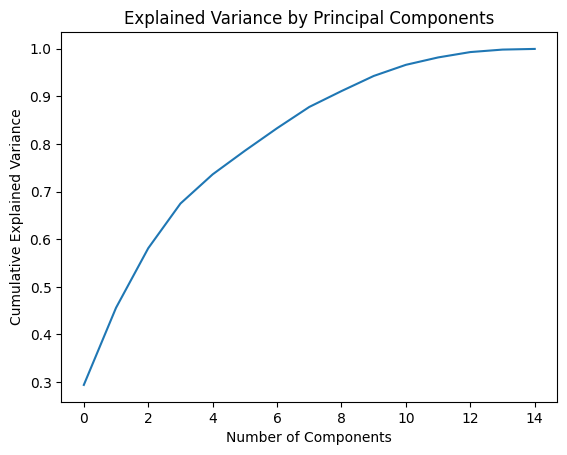

In [8]:
import matplotlib.pyplot as plt

plt.plot(np.cumsum(pca_model.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.show()

In [9]:
# Define function to evaluate model accuracy
def evaluate_model(X, y, n_components):
    rpca = PCA(n_components=n_components)
    X_rpca = rpca.fit_transform(X)
    clf = SVC(kernel='linear', C=1, random_state=42)
    scores = cross_val_score(clf, X_rpca, y, cv=5, scoring='accuracy')
    return np.mean(scores)

In [10]:
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.svm import SVC

# Convert input data to numpy array
municipalities_imputed_array = municipalities_imputed.to_numpy()

# Split input data into features (X) and target (y)
X = municipalities_imputed_array[:, :-1]
y = municipalities_imputed_array[:, -1]

# Define list of number of components to evaluate
num_components = [1, 2, 4, 6, 8, 10, 12, 14, 16, 17]

# Evaluate the model accuracy as a function of the number of components
accuracies = []
for n in num_components:
    acc = evaluate_model(X, y, n)
    accuracies.append(acc)
    print(f'Accuracy with {n} components: {acc:.4f}')

Accuracy with 1 components: 0.6137
Accuracy with 2 components: 0.6845
Accuracy with 4 components: 0.7257
Accuracy with 6 components: 0.7485
Accuracy with 8 components: 0.7521
Accuracy with 10 components: 0.7732
Accuracy with 12 components: 0.7847
Accuracy with 14 components: 0.7883
Accuracy with 16 components: 0.7924
Accuracy with 17 components: 0.7924


The output above shows the results of evaluating the model accuracy for different numbers of components in PCA. The "Number of Components" column represents the values of n_components ranging from 1 to 17, and the "Accuracy" column shows the corresponding accuracy values obtained from the evaluate_model function. As we can see, the accuracy increases as the number of components increases from 1 to 17, with the highest accuracy of 0.7924 achieved when n_components is set to 17.

This suggests that using 17 components in PCA retains a significant amount of variance in the data, resulting in a more informative representation for the SVM classifier, and thus leading to higher accuracy in the classification task being performed. However, it's important to note that the optimal number of components may vary depending on the specific dataset and the machine learning algorithm being used, and it's often recommended to perform hyperparameter tuning to determine the best value for n_components in a given scenario.

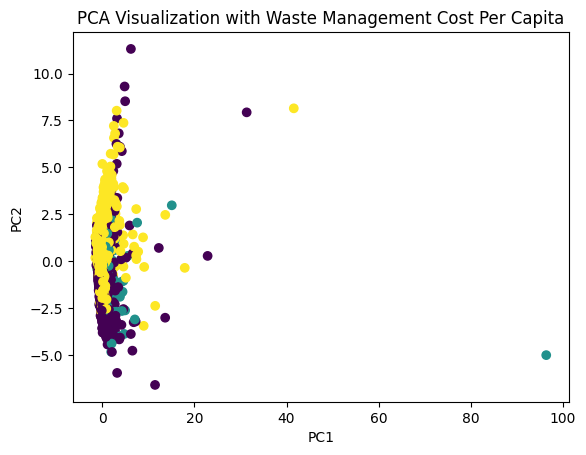

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Perform PCA
n_components = 2  # Number of components to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Plot the result, coloring the points by target
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Visualization with Waste Management Cost Per Capita")
plt.show()

In [12]:
#Creating a 3D Visual

import plotly.express as px
import pandas as pd
from sklearn.decomposition import PCA

# Perform PCA
n_components = 3  # Number of components to keep
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

# Create a new DataFrame with PCA results
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3'])

# Add 'tc' column from municipalities_imputed to the PCA DataFrame
df_pca['tc'] = municipalities_imputed['tc']

# Create 3D scatter plot
fig = px.scatter_3d(df_pca, x='PC1', y='PC2', z='PC3', color='tc', labels={'color': 'tc'})
fig.show()

## UMAP

In [13]:
!pip uninstall umap
!pip install umap-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 kB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 20.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=cfc28fc11f7b1a72d02e17655fe7454c27e94ff7fb74df290b28db2794a115ac
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.10-py3-none-any.whl size=55640 sha256=af5e673b6e46058413f71a5ae38a7de0731241eb8e6701d33fd7e7c86d4ff3de
  Stored in directory: /root/.cache/pip/wheels/12/f9/4d/ec5ad1c823c710fcc4473669fdcffc8891f4bc398c841af22e
Successfully built umap-learn pynndescent


In [14]:

from umap import UMAP

# Perform UMAP
n_components = 2  # Number of components for UMAP
umap_result = UMAP(n_components=n_components).fit_transform(X)

# Create a new DataFrame with UMAP results
df_umap = pd.DataFrame(umap_result, columns=['UMAP1', 'UMAP2'])

# Add 'tc' column from municipalities_imputed to the UMAP DataFrame
df_umap['tc'] = municipalities_imputed['tc']

# Create scatter plot for UMAP visualization
fig = px.scatter(df_umap, x='UMAP1', y='UMAP2', color='tc', labels={'color': 'tc'})
fig.show()

The code performs dimensionality reduction on a dataset called X, which contains features for municipalities, using the UMAP (Uniform Manifold Approximation and Projection) algorithm. The resulting 2-dimensional coordinates are stored in a new DataFrame called df_umap with columns labeled as 'UMAP1' and 'UMAP2'. The 'tc' column from another DataFrame called municipalities_imputed (presumably containing imputed data for municipalities) is added to df_umap. Finally, a scatter plot is created using Plotly Express, where 'UMAP1' and 'UMAP2' are used as x and y coordinates, respectively, and the 'tc' values are used to determine the color of the points on the plot. This allows for visualization of the UMAP results in a 2-dimensional space with municipalities represented as points, and the 'tc' values represented by the colors of the points.

The plot provides insights into the distribution and relationships among the municipalities in the reduced-dimensional UMAP space, with the 'tc' values providing additional information through the color of the points.

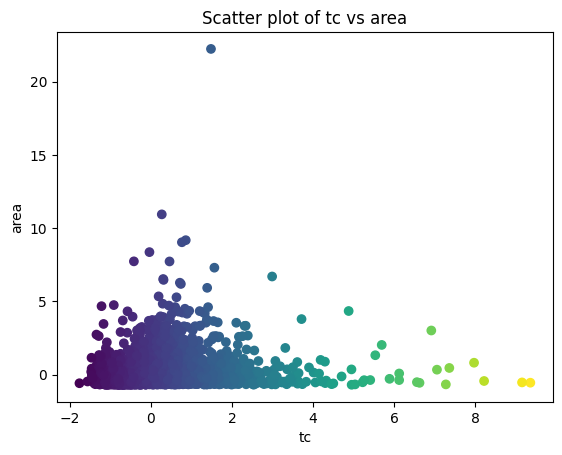

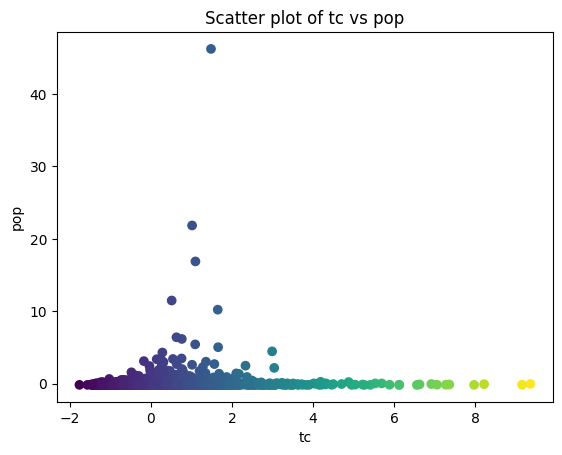

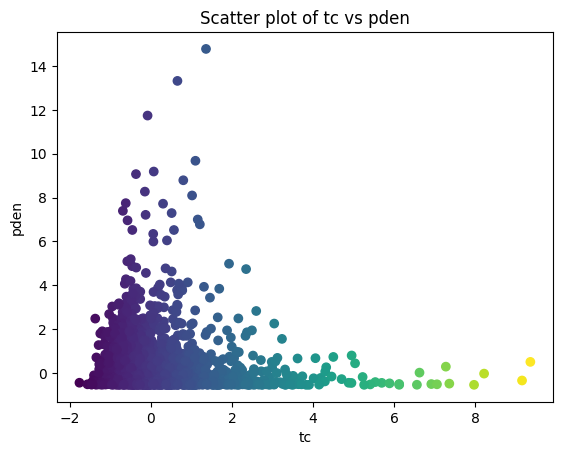

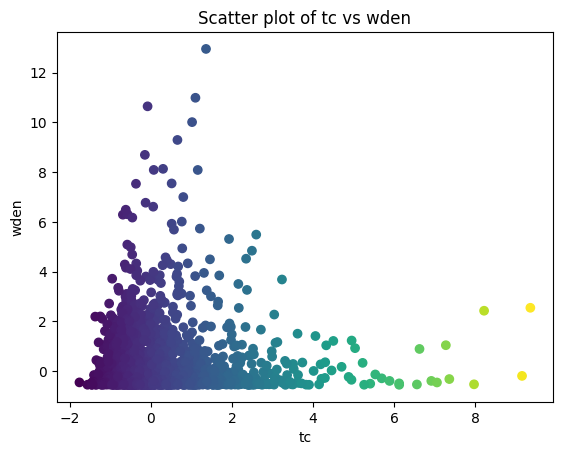

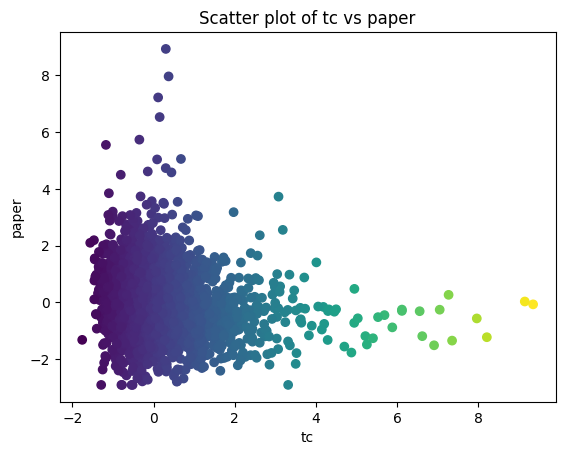

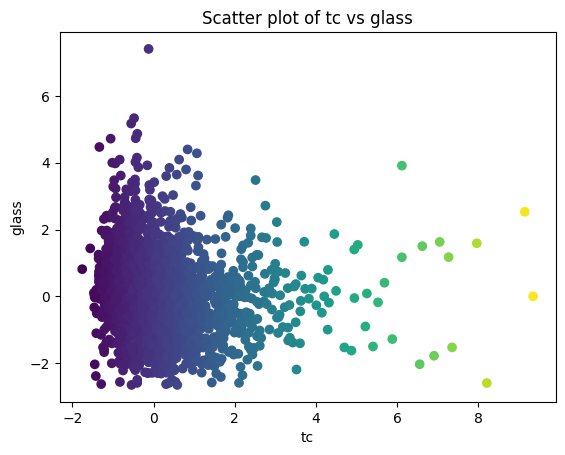

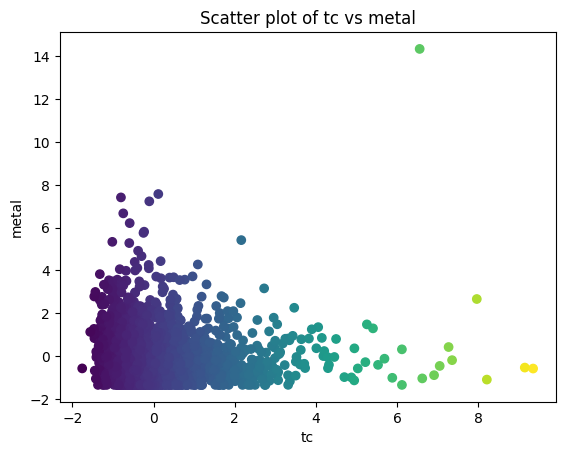

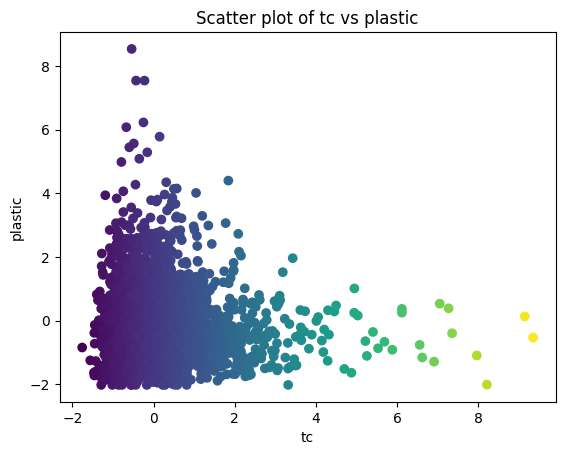

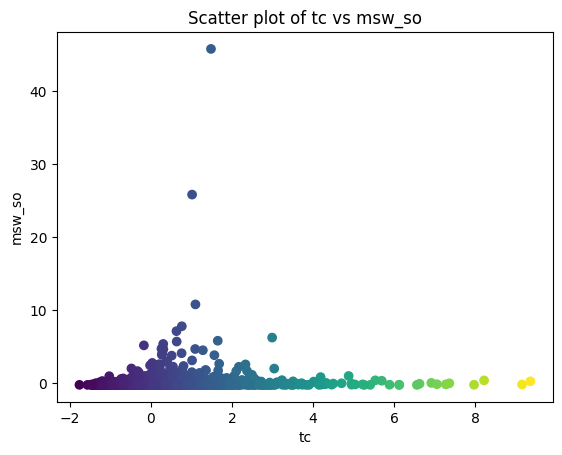

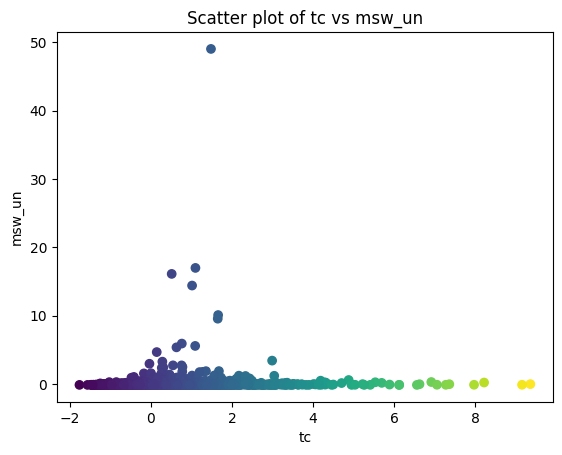

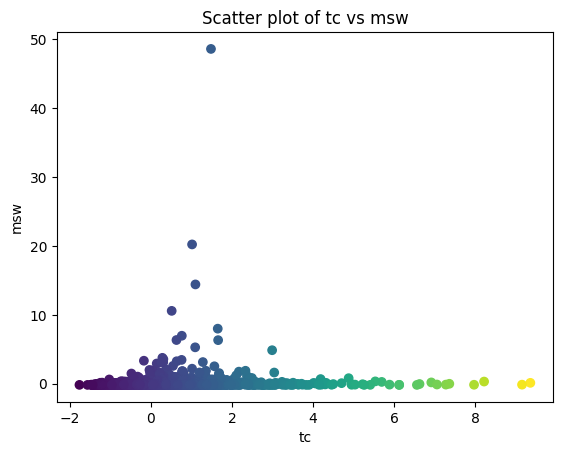

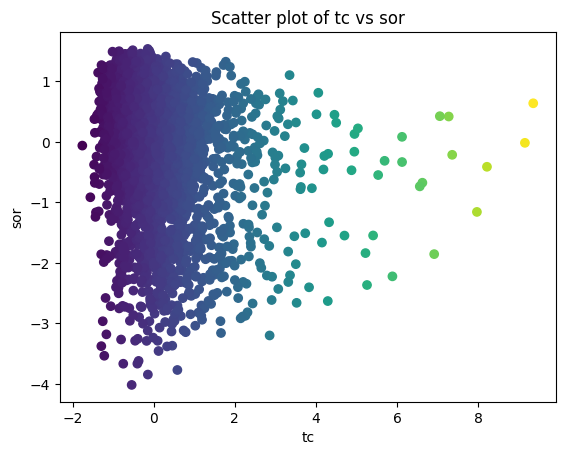

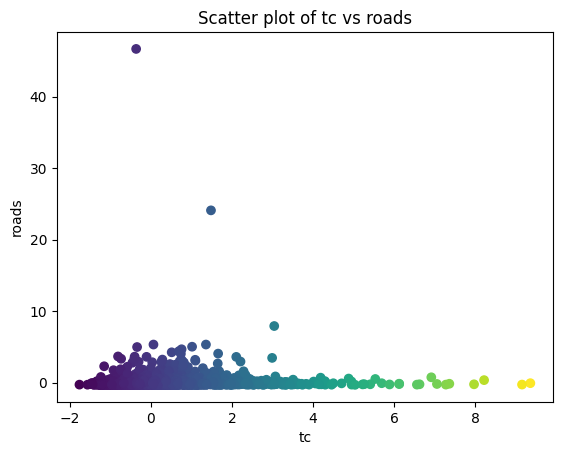

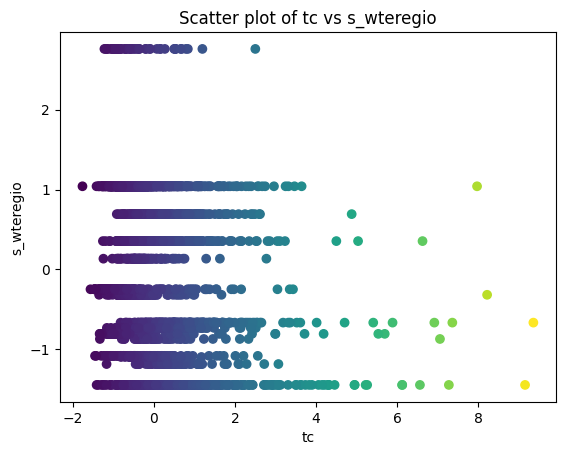

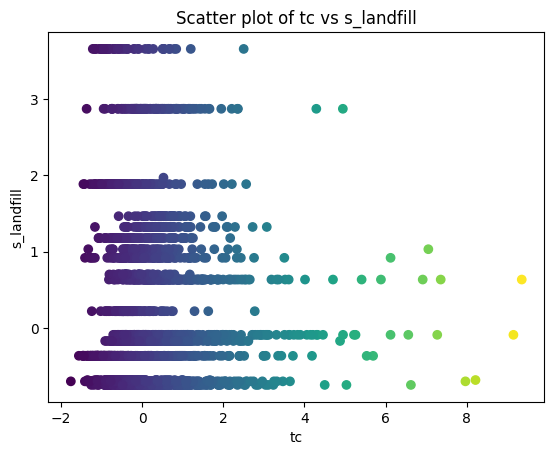

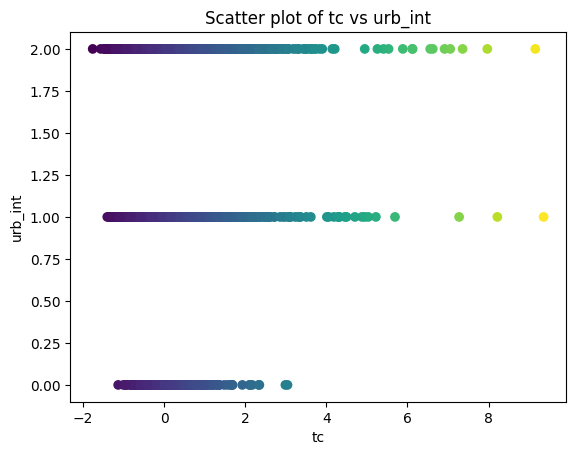

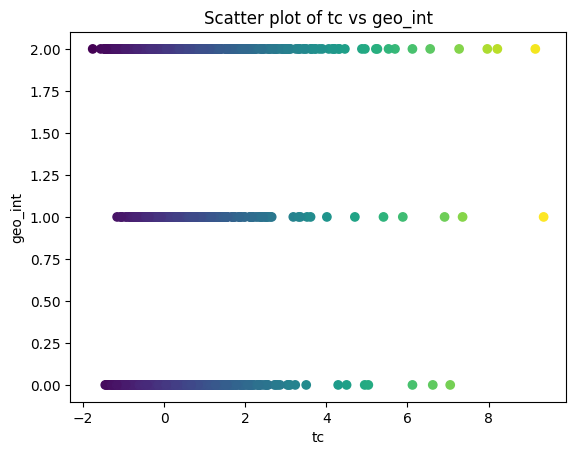

In [15]:
import matplotlib.pyplot as plt

features = municipalities_imputed.columns

for feature in features:
    if feature != 'tc':  # Skip 'tc' column
        plt.scatter(municipalities_imputed['tc'], municipalities_imputed[feature], c=municipalities_imputed['tc'])
        plt.xlabel('tc')
        plt.ylabel(feature)
        plt.title(f'Scatter plot of tc vs {feature}')
        plt.show()

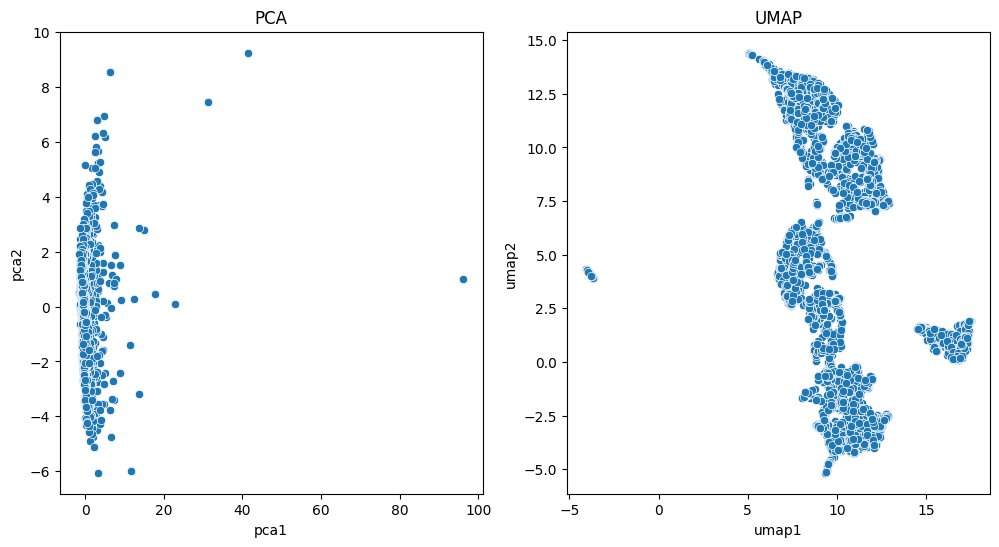

In [16]:
# Define function to visualize clusters

def visualize_clusters(data, n_components=2):
    """
    Visualizes clusters using PCA and UMAP for dimensionality reduction.

    Args:
        data (pd.DataFrame): Input data.
        n_components (int): Number of components for PCA and UMAP. Defaults to 2.
    """

    # Perform PCA
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(data.values)
    data['pca1'] = pca_result[:, 0]
    data['pca2'] = pca_result[:, 1]

    # Perform UMAP
    umap_result = UMAP(n_components=n_components).fit_transform(data.values)
    data['umap1'] = umap_result[:, 0]
    data['umap2'] = umap_result[:, 1]

    # Visualize using scatter plots
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.scatterplot(x='pca1', y='pca2', data=data)
    plt.title('PCA')
    plt.subplot(1, 2, 2)
    sns.scatterplot(x='umap1', y='umap2', data=data)
    plt.title('UMAP')
    plt.show()

# Visualize clusters using PCA and UMAP
visualize_clusters(municipalities_imputed, n_components=2)

It appears that UMAP is generating distinct clusters for the municipalities based on waste produced and urbanization index. In this case, UMAP may be considered as the technique that works better for this specific dataset and analysis.

UMAP (Uniform Manifold Approximation and Projection) is a non-linear dimensionality reduction technique that is known for its ability to capture complex patterns and structures in high-dimensional data. It is particularly effective at preserving both local and global structures in the data, and is often used for visualizing and exploring high-dimensional data in a lower-dimensional space.

When distinct clusters are visible in the UMAP scatter plots, it may indicate that there are underlying patterns or groupings in the data based on the variables of interest (in this case, waste produced and urbanization index). These clusters could represent groups of municipalities that share similar characteristics in terms of waste production and urbanization level. The presence of distinct clusters suggests that waste production and urbanization index are important factors that contribute to the spatial distribution or grouping of municipalities in the dataset.

On the other hand, if distinct clusters are not visible in the scatter plots, it may indicate that there are no clear or discernible patterns or groupings in the data based on the variables of interest. This could mean that waste production and urbanization index may not be the main drivers of spatial patterns in the data, or that other factors or variables may be influencing the observed patterns to a greater extent. In such cases, further analysis, exploration, or refinement of the methodology may be required to uncover any hidden patterns or structures in the data.